## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [80]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, \
roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV

#from xgboost import XGBClassifier
import warnings




#### Import the CSV Data as Pandas DataFrame

In [83]:
df = pd.read_csv("kalyani-sis-projects/streamlit/data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

#### Show Top 5 Records

In [3]:
df.head()

,age,gender,device_types_used,average_daily_usage_hours,years_of_digital_device_usage,ded_diagnosis,osdi_total_score,schirmer_test_left_eye,schirmer_test_right_eye,tbut_left_eye,tbut_right_eye,ocular_surface_staining_left_eye,ocular_surface_staining_right_eye,ded_severity,device_smartphone,device_computer,device_tablet,device_gaming_console
0,17,Female,"Smartphone, Computer",5,11,Yes,64.583333,1,5,1,4,3,2,Moderate,Yes,Yes,No,No
1,22,Female,"Tablet, Smartphone",8,1,Yes,83.333333,2,0,2,1,3,1,Severe,Yes,No,Yes,No
2,24,Female,"Smartphone, Computer",4,4,Yes,91.666667,1,2,2,5,1,1,Moderate,Yes,Yes,No,No
3,16,Female,"Gaming Console, Smartphone, Tablet",7,10,Yes,72.916667,0,5,4,1,1,3,Mild,Yes,No,Yes,Yes
4,21,Male,"Tablet, Smartphone",4,1,Yes,87.500000,2,3,3,1,3,3,Mild,Yes,No,Yes,No


In [4]:
df['ded_severity'].value_counts()

ded_severity
Normal      350
Severe      122
Moderate    117
Mild        111
Name: count, dtype: int64

### up sampling the data

In [5]:
df_mild_minority = df[df['ded_severity'] == 'Mild']
df_moderate_minority = df[df['ded_severity'] == 'Moderate']
df_severe_minority = df[df['ded_severity'] == 'Severe']
df_normal_majority = df[df['ded_severity'] == 'Normal']

In [6]:
from sklearn.utils import resample

resample 
- it create new points and equalizes the no.of datapoints with majority

In [7]:
df_severe_upsampled = resample(df_severe_minority, replace=True, # sample with replacement
         n_samples= len(df_normal_majority),
         random_state=19 
        )
df_moderate_upsampled = resample(df_moderate_minority, replace=True, # sample with replacement
         n_samples= len(df_normal_majority),
         random_state=19 
        )
df_mild_upsampled = resample(df_mild_minority, replace=True, # sample with replacement
         n_samples= len(df_normal_majority),
         random_state=19 
        )

In [8]:
df_upsampled = pd.concat([df_normal_majority, df_severe_upsampled ,df_moderate_upsampled, df_mild_upsampled ]).reset_index(drop=True)


In [9]:
df_upsampled.head()

,age,gender,device_types_used,average_daily_usage_hours,years_of_digital_device_usage,ded_diagnosis,osdi_total_score,schirmer_test_left_eye,schirmer_test_right_eye,tbut_left_eye,tbut_right_eye,ocular_surface_staining_left_eye,ocular_surface_staining_right_eye,ded_severity,device_smartphone,device_computer,device_tablet,device_gaming_console
0,20,Male,"Smartphone, Computer",10,12,No,10.03,13,11,13,14,0,0,Normal,Yes,Yes,No,No
1,12,Female,"Tablet, Smartphone",5,3,No,9.09,14,10,13,12,0,0,Normal,Yes,No,Yes,No
2,18,Female,"Smartphone, Computer",8,7,No,9.59,13,15,15,11,0,0,Normal,Yes,Yes,No,No
3,21,Female,"Gaming Console, Smartphone, Tablet",6,11,No,1.58,15,14,15,13,0,0,Normal,Yes,No,Yes,Yes
4,22,Female,"Gaming Console, Smartphone, Tablet",2,10,No,2.14,13,15,14,14,0,0,Normal,Yes,No,Yes,Yes


In [10]:
df_upsampled['ded_severity'].value_counts()

ded_severity
Normal      350
Severe      350
Moderate    350
Mild        350
Name: count, dtype: int64

In [11]:
df = df_upsampled.copy()

In [12]:
df.drop(columns=['device_smartphone', 'device_computer', 'device_tablet',
       'device_gaming_console'], axis=1, inplace=True)

#### Preparing X and Y variables

In [13]:
X = df.drop(columns=['ded_severity', 'ded_diagnosis'],axis=1)

In [14]:
X.head()

,age,gender,device_types_used,average_daily_usage_hours,years_of_digital_device_usage,osdi_total_score,schirmer_test_left_eye,schirmer_test_right_eye,tbut_left_eye,tbut_right_eye,ocular_surface_staining_left_eye,ocular_surface_staining_right_eye
0,20,Male,"Smartphone, Computer",10,12,10.03,13,11,13,14,0,0
1,12,Female,"Tablet, Smartphone",5,3,9.09,14,10,13,12,0,0
2,18,Female,"Smartphone, Computer",8,7,9.59,13,15,15,11,0,0
3,21,Female,"Gaming Console, Smartphone, Tablet",6,11,1.58,15,14,15,13,0,0
4,22,Female,"Gaming Console, Smartphone, Tablet",2,10,2.14,13,15,14,14,0,0


In [15]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [16]:
num_features

Index(['age', 'average_daily_usage_hours', 'years_of_digital_device_usage',
       'osdi_total_score', 'schirmer_test_left_eye', 'schirmer_test_right_eye',
       'tbut_left_eye', 'tbut_right_eye', 'ocular_surface_staining_left_eye',
       'ocular_surface_staining_right_eye'],
      dtype='object')

In [17]:
cat_features

Index(['gender', 'device_types_used'], dtype='object')

In [18]:
df


,age,gender,device_types_used,average_daily_usage_hours,years_of_digital_device_usage,ded_diagnosis,osdi_total_score,schirmer_test_left_eye,schirmer_test_right_eye,tbut_left_eye,tbut_right_eye,ocular_surface_staining_left_eye,ocular_surface_staining_right_eye,ded_severity
0,20,Male,"Smartphone, Computer",10,12,No,10.030000,13,11,13,14,0,0,Normal
1,12,Female,"Tablet, Smartphone",5,3,No,9.090000,14,10,13,12,0,0,Normal
2,18,Female,"Smartphone, Computer",8,7,No,9.590000,13,15,15,11,0,0,Normal
3,21,Female,"Gaming Console, Smartphone, Tablet",6,11,No,1.580000,15,14,15,13,0,0,Normal
4,22,Female,"Gaming Console, Smartphone, Tablet",2,10,No,2.140000,13,15,14,14,0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,24,Female,"Smartphone, Computer",5,1,Yes,83.333333,3,4,3,4,1,3,Mild
1396,21,Female,"Gaming Console, Smartphone, Tablet",7,1,Yes,77.083333,5,1,3,4,3,1,Mild
1397,28,Male,"Tablet, Smartphone",7,3,Yes,83.333333,0,0,1,0,2,2,Mild
1398,25,Male,"Tablet, Smartphone",9,11,Yes,89.583333,1,5,0,4,2,1,Mild


In [19]:
y = df['ded_severity']

In [20]:
y

0       Normal
1       Normal
2       Normal
3       Normal
4       Normal
         ...  
1395      Mild
1396      Mild
1397      Mild
1398      Mild
1399      Mild
Name: ded_severity, Length: 1400, dtype: object

In [21]:
y = y.map({'Normal' : 0, 'Mild':1, 'Moderate' : 2, 'Severe' : 3})

In [22]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1395    1
1396    1
1397    1
1398    1
1399    1
Name: ded_severity, Length: 1400, dtype: int64

### train test split

In [23]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42  )
X_train.shape, X_test.shape

((980, 12), (420, 12))

In [24]:
y_test.value_counts()

ded_severity
2    114
3    110
1    101
0     95
Name: count, dtype: int64

In [25]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='if_binary')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

<function matplotlib.pyplot.show(close=None, block=None)>

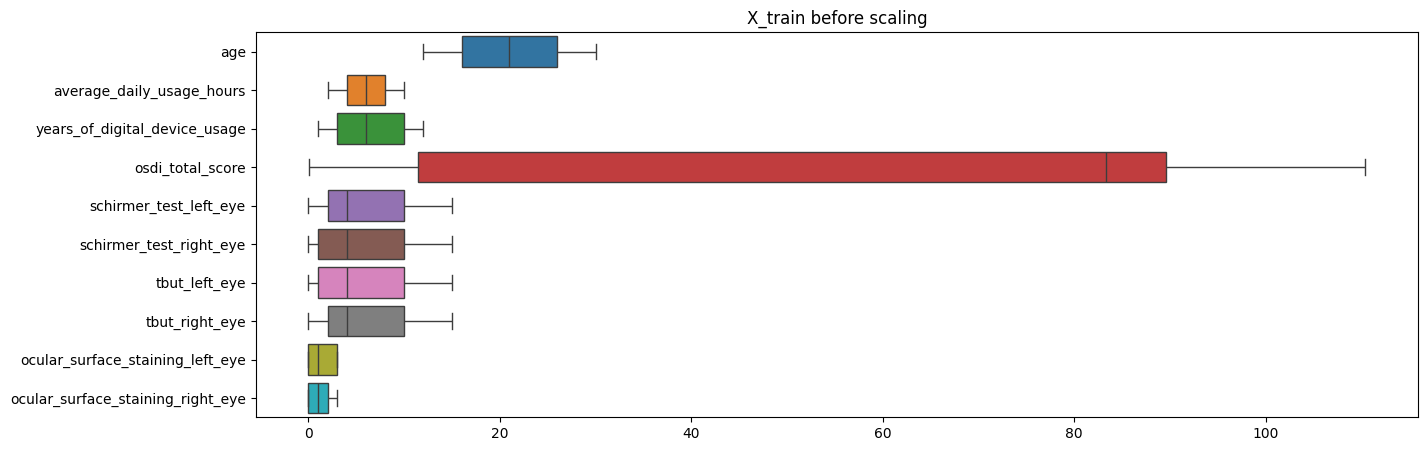

In [26]:
plt.figure(figsize=[15,5])
#plt.subplot(121)
sns.boxplot(data=X_train, orient='h' )
plt.title('X_train before scaling')
#plt.xticks(rotation=45)
plt.show

In [27]:
X_train=preprocessor.fit_transform(X_train)

In [28]:
X_train.shape, y_train.shape

((980, 14), (980,))

In [29]:
# If you have a pipeline, get feature names after transformations
#from sklearn.compose import ColumnTransformer

# Assuming `pipeline` is your full model pipeline, including transformers
#transformer = pipeline.named_steps['preprocessor']  # or your actual transformer name

# After transformation
feature_names = preprocessor.get_feature_names_out()

print(feature_names)

['OneHotEncoder__gender_Male'
 'OneHotEncoder__device_types_used_Gaming Console, Smartphone, Tablet'
 'OneHotEncoder__device_types_used_Smartphone, Computer'
 'OneHotEncoder__device_types_used_Tablet, Smartphone'
 'StandardScaler__age' 'StandardScaler__average_daily_usage_hours'
 'StandardScaler__years_of_digital_device_usage'
 'StandardScaler__osdi_total_score'
 'StandardScaler__schirmer_test_left_eye'
 'StandardScaler__schirmer_test_right_eye' 'StandardScaler__tbut_left_eye'
 'StandardScaler__tbut_right_eye'
 'StandardScaler__ocular_surface_staining_left_eye'
 'StandardScaler__ocular_surface_staining_right_eye']


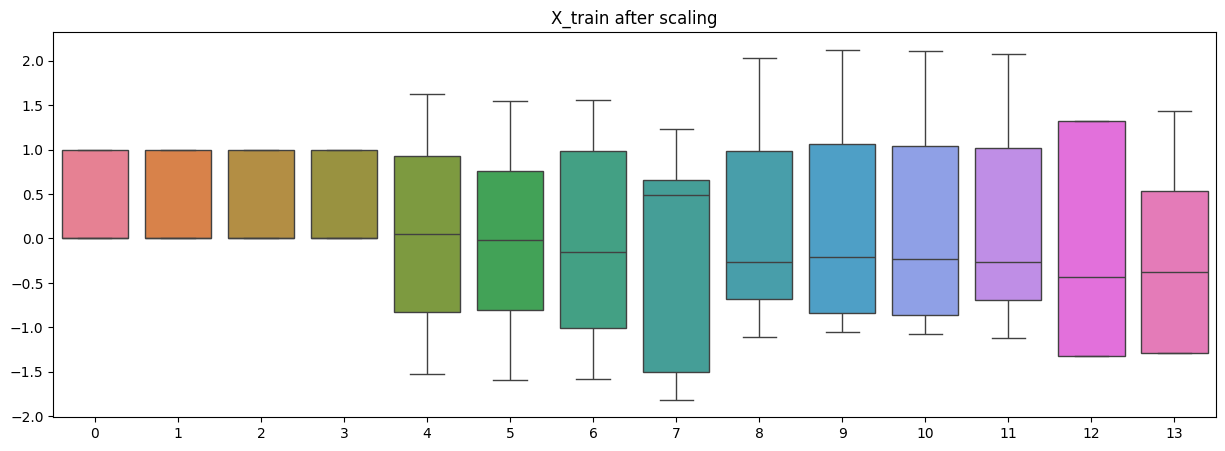

In [30]:
#plt.subplot(122)
plt.figure(figsize=[15,5])
sns.boxplot(data=X_train)
plt.title('X_train after scaling')

plt.show()

In [31]:
pd.DataFrame(X_train)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.0,1.0,0.0,-1.001704,-0.804029,0.701094,0.314066,-0.060392,-0.205738,-0.650675,-1.115966,-0.437255,0.528536
1,1.0,1.0,0.0,0.0,-0.300010,1.153121,1.271042,0.889470,-0.268788,0.005829,-0.014709,-0.264548,1.318933,-0.381772
2,1.0,0.0,0.0,1.0,0.577107,0.370261,-1.578698,0.774389,-0.268788,-0.205738,-0.014709,-0.690257,0.440839,-0.381772
3,0.0,1.0,0.0,0.0,-0.475433,0.761691,0.986068,0.371607,-0.477184,-0.628872,-0.226698,-0.051693,-0.437255,1.438844
4,0.0,1.0,0.0,0.0,1.629648,1.153121,0.416120,-1.627667,1.815169,1.909932,2.105175,2.076851,-1.315349,-1.292080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,1.0,1.0,0.0,0.0,0.401684,0.761691,1.271042,0.544228,-0.060392,-0.840439,-0.014709,-0.903111,-0.437255,0.528536
976,0.0,0.0,1.0,0.0,0.927954,0.761691,-1.008750,0.831930,-0.477184,-0.628872,-0.014709,-0.690257,0.440839,-0.381772
977,0.0,0.0,0.0,1.0,1.278801,0.370261,-0.153828,0.026365,-0.685579,-0.417305,-0.438686,-0.051693,0.440839,0.528536
978,1.0,0.0,1.0,0.0,1.278801,-0.412599,1.556016,0.889470,-0.893975,-0.205738,-0.438686,-0.264548,0.440839,1.438844


In [32]:
X_test = preprocessor.transform(X_test)

In [33]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,0.0,1.0,-0.475433,0.370261,-0.438802,0.083905,-0.477184,-0.417305,-0.650675,-0.264548,0.440839,0.528536
1,0.0,1.0,0.0,0.0,-1.177127,-0.021169,1.556016,0.486688,-0.685579,-0.205738,-0.862663,-0.477402,1.318933,-0.381772
2,1.0,0.0,1.0,0.0,-1.001704,-0.804029,0.986068,-1.688706,1.189982,1.275231,1.257222,1.012579,-1.315349,-1.292080
3,0.0,1.0,0.0,0.0,-0.826280,1.544551,0.986068,0.371607,-0.477184,-0.417305,-1.074652,-1.115966,1.318933,0.528536
4,0.0,0.0,1.0,0.0,-0.650857,-0.412599,0.701094,-1.791450,2.023564,1.486798,1.893187,1.438288,-1.315349,-1.292080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,0.0,0.0,0.0,1.0,-0.826280,1.153121,-1.578698,-1.546743,1.815169,1.486798,1.257222,1.225434,-1.315349,-1.292080
416,1.0,0.0,0.0,1.0,-1.527974,-1.586890,-0.438802,1.234712,-0.893975,-0.840439,-1.074652,-1.115966,-0.437255,1.438844
417,0.0,1.0,0.0,0.0,1.278801,-0.021169,-1.008750,0.198986,-1.102370,-0.628872,-0.650675,-0.690257,0.440839,0.528536
418,0.0,0.0,1.0,0.0,-0.124586,1.153121,-0.438802,-1.526857,1.398377,1.275231,1.045233,1.012579,-1.315349,-1.292080


In [34]:
y_test.value_counts()

ded_severity
2    114
3    110
1    101
0     95
Name: count, dtype: int64

#### Create an Evaluate Function to give all metrics after model Training

In [35]:
def evaluate_model(true, predicted):
    
    y_pred_labels = np.argmax(predicted, axis=1)
    accuracy = accuracy_score(true, y_pred_labels ) # Calculate Accuracy
    f1 = f1_score(true, y_pred_labels, average='weighted') # Calculate F1-score
    precision = precision_score(true, y_pred_labels, average='weighted') # Calculate Precision
    recall = recall_score(true, y_pred_labels, average='weighted') # Calculate Recall
    rocauc_score = roc_auc_score(true, predicted, multi_class='ovr', average='weighted')
    return accuracy, f1, precision, recall, rocauc_score

In [36]:
print(set(y_test))

{0, 1, 2, 3}


In [37]:
#roc_auc_score(y_train, y_train_pred, multi_class='ovr')
#roc_auc_score(y_train, y_train_pred, multi_class='ovr', average='weighted')

In [38]:
#print(y_train_pred.shape)  # Should be (n_samples, n_classes)


In [39]:
models = {

    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Adaboost' : AdaBoostClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier(),
    #'xgboost': XGBClassifier()
}
model_list = []
roc_auc_score_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict_proba(X_train)
    y_test_pred = model.predict_proba(X_test)
    
    # Evaluate Train and Test dataset
    model_train_accuracy , model_train_f1, model_train_precision, model_train_recall, model_train_rocauc_score = evaluate_model(y_train, y_train_pred)

    model_test_accuracy , model_test_f1, model_test_precision, model_test_recall, model_test_rocauc_score = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    print('----------------------------------')
    
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    roc_auc_score_list.append(model_test_rocauc_score)
    
    print('='*35)
    print('\n')


    

K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.8653
- F1 score: 0.8649
- Precision: 0.8670
- Recall: 0.8653
- Roc Auc Score: 0.9756
----------------------------------
Model performance for Test set
- Accuracy: 0.7333
- F1 score: 0.7346
- Precision: 0.7501
- Recall: 0.7333
- Roc Auc Score: 0.9116


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9167
- F1 score: 0.9167
- Precision: 0.9179
- Recall: 0.9167
- Roc Auc Score: 0.9441


Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9119
- F1 score: 0.9116
- Precision: 0.9135
- Recall: 0.9119
- Roc Auc Score: 0.9917


Logistic Regression
Model performan

### Results

In [40]:
pd.DataFrame(list(zip(model_list, roc_auc_score_list)), columns=['Model Name', 'Roc_Auc_Score']).sort_values(by=["Roc_Auc_Score"],ascending=False)


,Model Name,Roc_Auc_Score
2,Random Forest Classifier,0.991750
5,Gradient Boosting,0.954604
1,Decision Tree,0.944108
0,K-Neighbors Classifier,0.911551
4,Adaboost,0.770968
3,Logistic Regression,0.769119


## Random Forest Classifier

In [41]:
model = RandomForestClassifier()
model = model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

(model_test_accuracy , model_test_f1, model_test_precision, model_test_recall, model_test_rocauc_score) = evaluate_model(y_test, y_pred)
print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
roc_auc_score_list.append(model_test_rocauc_score)
    


Model performance for Test set
- Accuracy: 0.9071
- F1 score: 0.9066
- Precision: 0.9076
- Recall: 0.9071
- Roc Auc Score: 0.9915


#### Actual and Predicted Values

In [42]:
y_labels = np.argmax(y_pred, axis=1)

In [43]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_labels})
pred_df

,Actual Value,Predicted Value
665,3,1
624,3,3
115,0,0
478,3,3
233,0,0
...,...,...
287,0,0
1349,1,1
1163,1,1
294,0,0


In [44]:
pred_df['Actual Value'].value_counts(sort=False)

Actual Value
3    110
0     95
2    114
1    101
Name: count, dtype: int64

In [45]:
pred_df['Predicted Value'].value_counts(sort=False)

Predicted Value
1    111
3    107
0     95
2    107
Name: count, dtype: int64

#### Confusion Matrix

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

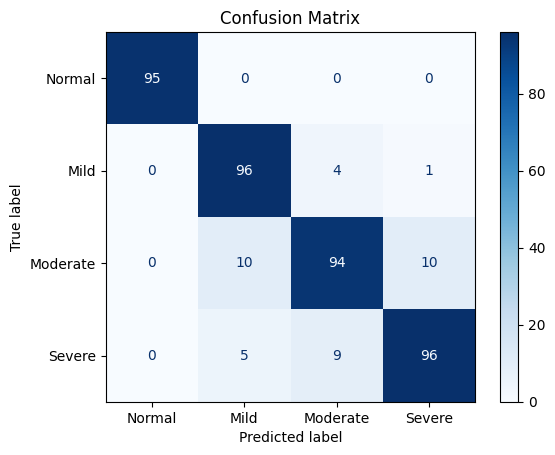

In [47]:
cm = confusion_matrix(y_test, y_labels)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=['Normal', 'Mild', 'Moderate', 'Severe'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [48]:
model

RandomForestClassifier()

In [49]:
import pickle


In [50]:
with open('/Users/bhargavdamarla/kalyani-sis-projects/streamlit/model.pkl', 'wb') as file:
    pickle.dump(model, file)



In [51]:
import joblib
joblib.dump(model, "/Users/bhargavdamarla/kalyani-sis-projects/streamlit/model.joblib")


['/Users/bhargavdamarla/kalyani-sis-projects/streamlit/model.joblib']

In [52]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Assuming model is already loaded here (model.pkl or model.joblib)
model = joblib.load('/Users/bhargavdamarla/kalyani-sis-projects/streamlit/model.pkl')

# Re-save model using the latest scikit-learn and joblib
joblib.dump(model, '/Users/bhargavdamarla/kalyani-sis-projects/streamlit/model_retrained.joblib')


['/Users/bhargavdamarla/kalyani-sis-projects/streamlit/model_retrained.joblib']

In [53]:
len(df.columns
)

14

In [54]:
X

,age,gender,device_types_used,average_daily_usage_hours,years_of_digital_device_usage,osdi_total_score,schirmer_test_left_eye,schirmer_test_right_eye,tbut_left_eye,tbut_right_eye,ocular_surface_staining_left_eye,ocular_surface_staining_right_eye
0,20,Male,"Smartphone, Computer",10,12,10.030000,13,11,13,14,0,0
1,12,Female,"Tablet, Smartphone",5,3,9.090000,14,10,13,12,0,0
2,18,Female,"Smartphone, Computer",8,7,9.590000,13,15,15,11,0,0
3,21,Female,"Gaming Console, Smartphone, Tablet",6,11,1.580000,15,14,15,13,0,0
4,22,Female,"Gaming Console, Smartphone, Tablet",2,10,2.140000,13,15,14,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1395,24,Female,"Smartphone, Computer",5,1,83.333333,3,4,3,4,1,3
1396,21,Female,"Gaming Console, Smartphone, Tablet",7,1,77.083333,5,1,3,4,3,1
1397,28,Male,"Tablet, Smartphone",7,3,83.333333,0,0,1,0,2,2
1398,25,Male,"Tablet, Smartphone",9,11,89.583333,1,5,0,4,2,1


In [55]:
df[df['ded_severity'] == 'Severe']

,age,gender,device_types_used,average_daily_usage_hours,years_of_digital_device_usage,ded_diagnosis,osdi_total_score,schirmer_test_left_eye,schirmer_test_right_eye,tbut_left_eye,tbut_right_eye,ocular_surface_staining_left_eye,ocular_surface_staining_right_eye,ded_severity
350,23,Female,"Tablet, Smartphone",9,1,Yes,77.083333,5,0,3,4,1,1,Severe
351,25,Female,"Gaming Console, Smartphone, Tablet",2,5,Yes,89.583333,3,0,5,3,2,3,Severe
352,19,Male,"Smartphone, Computer",9,3,Yes,93.750000,5,2,0,3,2,3,Severe
353,16,Female,"Smartphone, Computer",6,9,Yes,83.333333,0,5,5,5,1,1,Severe
354,25,Female,"Smartphone, Computer",4,1,Yes,97.916667,5,0,2,3,3,2,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,29,Female,"Tablet, Smartphone",8,8,Yes,91.666667,5,3,3,5,1,3,Severe
696,25,Female,"Smartphone, Computer",4,1,Yes,97.916667,5,0,2,3,3,2,Severe
697,16,Female,"Tablet, Smartphone",7,1,Yes,85.416667,1,0,4,4,3,2,Severe
698,29,Female,"Tablet, Smartphone",8,8,Yes,91.666667,5,3,3,5,1,3,Severe


In [56]:
df['device_types_used'].unique()

array(['Smartphone, Computer', 'Tablet, Smartphone',
       'Gaming Console, Smartphone, Tablet'], dtype=object)

In [57]:
df_mild_minority

,age,gender,device_types_used,average_daily_usage_hours,years_of_digital_device_usage,ded_diagnosis,osdi_total_score,schirmer_test_left_eye,schirmer_test_right_eye,tbut_left_eye,tbut_right_eye,ocular_surface_staining_left_eye,ocular_surface_staining_right_eye,ded_severity,device_smartphone,device_computer,device_tablet,device_gaming_console
3,16,Female,"Gaming Console, Smartphone, Tablet",7,10,Yes,72.916667,0,5,4,1,1,3,Mild,Yes,No,Yes,Yes
4,21,Male,"Tablet, Smartphone",4,1,Yes,87.500000,2,3,3,1,3,3,Mild,Yes,No,Yes,No
6,28,Female,"Gaming Console, Smartphone, Tablet",6,12,Yes,83.333333,3,4,1,5,3,3,Mild,Yes,No,Yes,Yes
8,13,Female,"Gaming Console, Smartphone, Tablet",3,1,Yes,87.500000,4,5,5,4,2,1,Mild,Yes,No,Yes,Yes
11,28,Female,"Gaming Console, Smartphone, Tablet",6,3,Yes,72.916667,0,2,2,2,2,2,Mild,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,20,Male,"Smartphone, Computer",2,12,Yes,91.666667,1,1,3,3,3,1,Mild,Yes,Yes,No,No
345,15,Male,"Gaming Console, Smartphone, Tablet",9,4,Yes,89.583333,5,0,3,1,1,3,Mild,Yes,No,Yes,Yes
346,21,Male,"Smartphone, Computer",5,8,Yes,106.250000,1,5,0,0,3,1,Mild,Yes,Yes,No,No
348,22,Male,"Tablet, Smartphone",4,8,Yes,83.333333,2,2,2,3,1,2,Mild,Yes,No,Yes,No


In [64]:
df[df['osdi_total_score'] >= 95.833333]['ded_severity'].value_counts()


ded_severity
Mild        65
Moderate    61
Severe      54
Name: count, dtype: int64

In [68]:
df['ded_severity']

0       Normal
1       Normal
2       Normal
3       Normal
4       Normal
         ...  
1395      Mild
1396      Mild
1397      Mild
1398      Mild
1399      Mild
Name: ded_severity, Length: 1400, dtype: object